(667, 1000, 3)
(1334, 2000, 3)


<IPython.core.display.Javascript object>


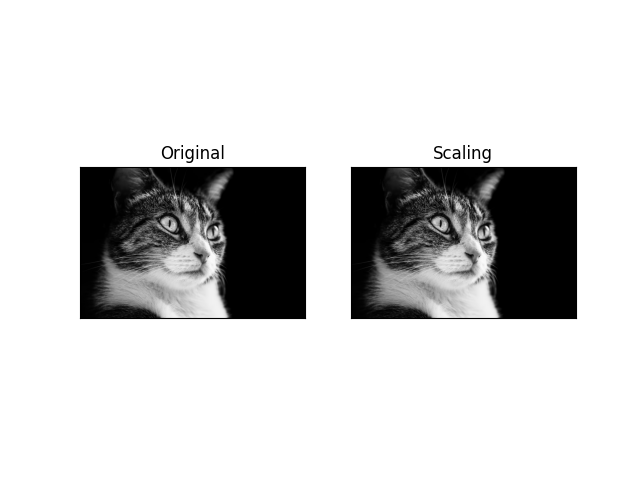

In [4]:
%matplotlib notebook
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from ShowImg import showImg


#Scaling: resize image
img = cv.imread('meo.jpeg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
print(img.shape)
print(res.shape)
titles = ['Original','Scaling']
images = [img, res]
showImg(2,images,titles)

# #or we can do:
# height, width = img.shape[:2]
# res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)





In some deep neutral network, it can only receive input images with fixed size. 

So we must resize images to feed them into our network

<IPython.core.display.Javascript object>


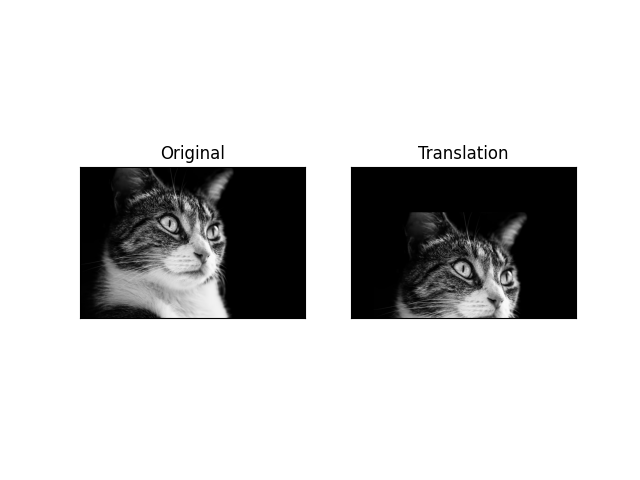

In [7]:
#Translation is used to improve visualization of an image, 
#but also has a role as a preprocessor in applications where registration of two or more images is required.
rows = img.shape[0]
cols = img.shape[1]
M = np.float32([[1,0,100],[0,1,200]])
dst = cv.warpAffine(img,M,(cols,rows))
titles = ['Original','Translation']
images = [img, dst]
showImg(2,images,titles)


<IPython.core.display.Javascript object>


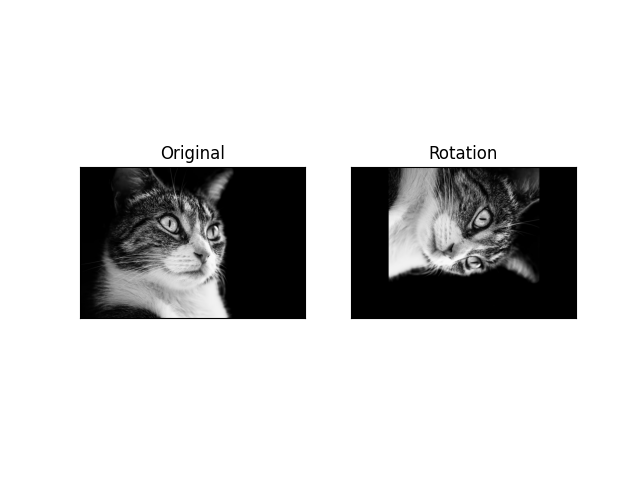

In [10]:
#Rotation: rotate image. Can rotate up to 360 degrees
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),270,1) 
dst2 = cv.warpAffine(img,M,(cols,rows))
titles = ['Original','Rotation']
images = [img, dst2]
showImg(2,images,titles)

<IPython.core.display.Javascript object>


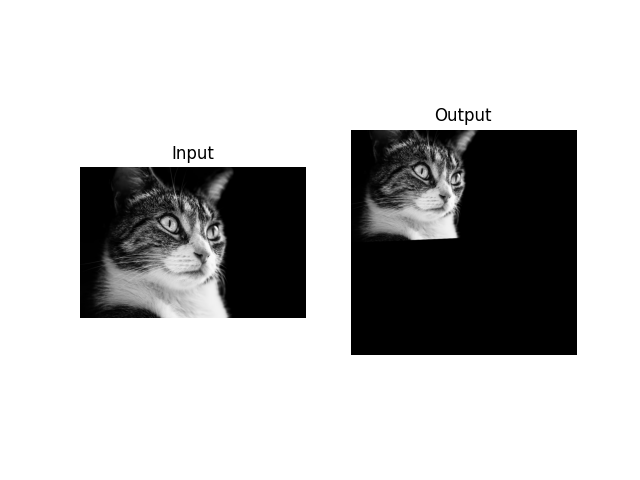

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5ce83da860>,
 Text(0.5, 1.0, 'Output'),
 (-0.5, 999.5, 999.5, -0.5))

In [16]:
#Perspective transformation (Zoom in/out)
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(1000,1000))
plt.subplot(121),plt.imshow(img),plt.title('Input'), plt.axis('off')
plt.subplot(122),plt.imshow(dst),plt.title('Output'), plt.axis('off')